In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing Basic Libraries**

In [ ]:
import sklearn
import numpy as np
import pandas as pd

**Import data**

In [ ]:
# training data
train = pd.read_csv("drive/My Drive/SentimentAnalysis/train.csv")

# test data
test = pd.read_csv("drive/My Drive/SentimentAnalysis/test.csv")

**Exploring Data**

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [ ]:
# non-racist/sexist related tweets
sum(train["label"] == 0)

29720

In [ ]:
# racist/sexist related tweets
sum(train["label"] == 1)

2242

In [ ]:
# check if there are any missing values
train.isnull().values.any()

False

**Data Cleaning**

In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# remove special characters
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [ ]:
import preprocessor as p

def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [ ]:
# clean
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [ ]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [ ]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)

test["clean_tweet"] = test_tweet

test.tail()

,id,tweet,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download


**Test and train split**

In [ ]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

**Vectorize tweets using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ["This is the sample for showing what vectorizer does",
             "Data is fascinating!"]

vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())

,data,does,fascinating,for,is,sample,showing,the,this,vectorizer,what
0,0,1,0,1,1,1,1,1,1,1,1
1,1,0,1,0,1,0,0,0,0,0,0


In [ ]:
# vectorize tweets
vectorizer = CountVectorizer(binary=True, stop_words='english')



# Learn
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

**Model Building**

Apply Support Vector Classifier

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

y_pred_svm = svm.predict(x_test_vec)

**Checking Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %


**Plotting Confusion Matrix**

Text(33.0, 0.5, 'y_pred_svm')

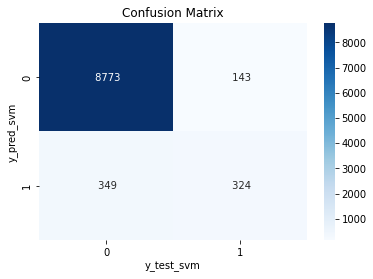

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns 
cm=confusion_matrix(y_test,y_pred_svm)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test_svm')
ax.set_ylabel('y_pred_svm')